In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Class_A.csv', header = None)

In [2]:
df.rename(columns={0: "x", 1: "y", 2: "label"}, inplace=True)
df.head()

,x,y,label
0,0.459694,-0.470583,0.0
1,0.797385,-0.343030,0.0
2,0.235270,0.961296,0.0
3,0.765453,-0.177644,0.0
4,-0.335577,-0.313893,0.0


In [3]:
df["x2"] = df["x"]*df["x"]
df["y2"] = df["y"]*df["y"]
df["xy"] = df["x"]*df["y"]
df.head()

,x,y,label,x2,y2,xy
0,0.459694,-0.470583,0.0,0.211319,0.221449,-0.216324
1,0.797385,-0.343030,0.0,0.635823,0.117670,-0.273527
2,0.235270,0.961296,0.0,0.055352,0.924089,0.226164
3,0.765453,-0.177644,0.0,0.585918,0.031557,-0.135978
4,-0.335577,-0.313893,0.0,0.112612,0.098529,0.105335


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["x", "y", "x2", "xy", "y2"]], df["label"], test_size=0.2, random_state=1234)

In [5]:
class LogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            if (_ == self.n_iters-1):
                print(dw)
                print(db)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [6]:
regressor = LogisticRegression(lr=0.001, n_iters=10000)
regressor.fit(X_train, y_train)

[ 0.00022925  0.00213674 -0.0608664   0.00542881 -0.06718081]
0.08676351396375065


In [7]:
predictions = regressor.predict(X_test)

In [8]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(predictions)):
    if predictions[i] == y_test.iloc[i] and predictions[i] == 1:
        TP += 1
    elif predictions[i] == y_test.iloc[i] and predictions[i] == 0:
        TN += 1
    elif predictions[i] != y_test.iloc[i] and predictions[i] == 1:
        FP += 1
    else:
        FN += 1

In [9]:
from tabulate import tabulate
print(tabulate([['Predicted Positive', TP, FP], ['Predicted Negative', FN, TN]], headers=['', 'Actual Positive', 'Acutal Negative']))

                      Actual Positive    Acutal Negative
------------------  -----------------  -----------------
Predicted Positive                 23                  1
Predicted Negative                  0                 16


In [10]:
print(f'Precision is: {(TP)/(TP + FP)}')
print(f'Recall is: {(TP)/(TP + FN)}')
print(f'Accuracy is: {(TP + TN)/(TP + TN + FP + FN)}')

Precision is: 0.9583333333333334
Recall is: 1.0
Accuracy is: 0.975


In [15]:
x_min, x_max = df['x'].min() - 1, df['x'].max() + 1
y_min, y_max = df['y'].min() - 1, df['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel(),
                            xx.ravel()**2, xx.ravel() * yy.ravel(),
                            yy.ravel()**2])
Z = Z.reshape(xx.shape)

<ipython-input-16-c5cf227018de>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], cmap="Greys_r")


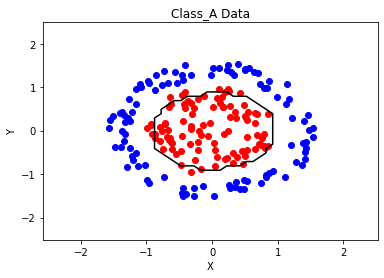

In [16]:
from matplotlib import pyplot as plt
  
plt.scatter(df.loc[df['label']==0]["x"], df.loc[df['label']==0]["y"], color='red')
plt.scatter(df.loc[df['label']==1]["x"], df.loc[df['label']==1]["y"], color='blue')
plt.contour(xx, yy, Z, levels=[0], cmap="Greys_r")
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Class_A Data")
  
plt.show()